출처: 
1. 국가물류통합정보센터 http://nlic.go.kr/nlic/KosGudeHtm.action
2. e-나라지표 http://index.go.kr/potal/stts/idxMain/selectPoSttsIdxMainPrint.do?idx_cd=1265&board_cd=INDX_001
3. kosis https://kosis.kr/statHtml/statHtml.do?orgId=116&tblId=DT_MLTM_662&conn_path=I2

## 유가 변동에 따른 물류, 유통 분야의 변화
1. 유가와 컨테이너 화물수송 실적과의 관계
2. 유가와 물동량 간의 관계

컨테이너수송실적통계 (19~22년상반기) 자료와 유가를 그래프로 비교함으로써 유가의 변동이 화물수송에 어떤 영향을  
미치는지에 대해 살펴보려고 했습니다. 
- 항만시설 이용 신고(화물료 신고)가 완료된 정보로 생성된 통계
- 물동량: 컨테이너, 벌크, 유류, 철재, 자동차, 잡화으로 구성 
- 단위: R/T

In [510]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import platform

if	platform.system()	==	'Windows':
        plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')

In [511]:
# 전처리 과정
FILE = '컨테이너+수송실적_총괄_20220719174318.csv'  # 컨테이너 관련 자료
FILE2 = 'inter_oil_price_month.csv'               # 유가 관련 자료
FILE3 = 'dom_int_cargo_year.csv'                  # 국내/해외 화물 관련 자료
contdf = pd.read_csv('./Data/' +FILE, header=1)
oildf = pd.read_csv('./Data/' +FILE2, index_col=0)
cargodf = pd.read_csv('./Data/' +FILE3, header=None)

# 결측치 제거
contdf['조회년도'] = contdf['조회년도'].fillna(method='ffill')
contdf['조회월'] = contdf['조회월'].fillna(method='ffill')
contdf.dropna(0, inplace=True)
contdf

C:\Users\User\AppData\Local\Temp\ipykernel_17436\2230987599.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  contdf.dropna(0, inplace=True)


,조회년도,조회월,국적선구분,적,공,계,적.1,공.1,계.1,적.2,공.2,계.2,적.3,공.3,계.3,적.4,공.4,계.4
1,2019,1.0,계,"52,492","3,058","55,550","556,802","141,703","698,505","680,593","164,340","844,933","4,081","1,158","5,239","1,953,416","474,518","2,427,934"
2,2019,1.0,국적선,"52,311","2,888","55,199","87,732","21,739","109,471","74,989","20,804","95,793",37,45,82,"263,949","64,892","328,841"
3,2019,1.0,외국선,181,170,351,"469,070","119,964","589,034","605,604","143,536","749,140","4,044","1,113","5,157","1,689,468","409,625","2,099,093"
4,2019,2.0,계,"30,835","1,798","32,633","483,088","121,626","604,714","617,547","146,612","764,159","3,622","1,792","5,414","1,741,749","419,781","2,161,530"
5,2019,2.0,국적선,"30,626","1,670","32,296","75,591","21,963","97,554","68,532","18,237","86,769",67,23,90,"228,119","59,324","287,443"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2022,4.0,국적선,"23,477","1,180","24,657","91,301","22,263","113,564","88,056","17,824","105,880",92,91,183,"279,359","58,706","338,064"
120,2022,4.0,외국선,153,74,227,"425,170","97,966","523,136","639,418","130,228","769,646","2,211","1,582","3,793","1,709,057","362,019","2,071,076"
121,2022,5.0,계,"19,798","2,924","22,722","547,092","135,960","683,052","767,651","157,640","925,291","2,981","2,554","5,535","2,099,000","458,448","2,557,448"
122,2022,5.0,국적선,"19,660","2,846","22,506","95,659","27,543","123,202","104,232","24,201","128,433",89,190,279,"314,153","77,796","391,949"


In [512]:
# 정수부분 str -> int 바꿔주기
contdf.iloc[:,3:] = contdf.iloc[:,3:].applymap(lambda x: x.replace(',', '')).astype(int)

In [513]:
# 적, 공, 계 부분 나눠서 합치기 
contdf['jeok'] = contdf.loc[:,contdf.columns.str.contains('적')].sum(numeric_only=True, axis=1)
contdf['gong'] = contdf.loc[:,contdf.columns.str.contains('공')].sum(numeric_only=True, axis=1)
contdf['gye'] = contdf.loc[:,contdf.columns.str.contains('계')].sum(numeric_only=True, axis=1)
contdf['rate'] = 100 * contdf['gong'] / contdf['gye']

In [514]:
# 값을 확인
contdf.head(10)


,조회년도,조회월,국적선구분,적,공,계,적.1,공.1,계.1,적.2,...,적.3,공.3,계.3,적.4,공.4,계.4,jeok,gong,gye,rate
1,2019,1.0,계,52492,3058,55550,556802,141703,698505,680593,...,4081,1158,5239,1953416,474518,2427934,3247384,784777,4032161,19.462938
2,2019,1.0,국적선,52311,2888,55199,87732,21739,109471,74989,...,37,45,82,263949,64892,328841,479018,110368,589386,18.725928
3,2019,1.0,외국선,181,170,351,469070,119964,589034,605604,...,4044,1113,5157,1689468,409625,2099093,2768367,674408,3442775,19.589081
4,2019,2.0,계,30835,1798,32633,483088,121626,604714,617547,...,3622,1792,5414,1741749,419781,2161530,2876841,691609,3568450,19.381216
5,2019,2.0,국적선,30626,1670,32296,75591,21963,97554,68532,...,67,23,90,228119,59324,287443,402935,101217,504152,20.076683
6,2019,2.0,외국선,209,128,337,407497,99663,507160,549015,...,3555,1769,5324,1513630,360457,1874088,2473906,590392,3064299,19.266788
7,2019,3.0,계,36597,1815,38412,597554,144675,742229,712865,...,3383,1430,4813,2049194,470286,2519480,3399593,778949,4178542,18.641646
8,2019,3.0,국적선,36363,1497,37860,95881,24001,119882,84342,...,80,32,112,282927,65140,348066,499593,110829,610421,18.156158
9,2019,3.0,외국선,234,318,552,501673,120674,622347,628523,...,3303,1398,4701,1766268,405147,2171414,2900001,668121,3568121,18.724729
10,2019,4.0,계,34284,1261,35545,571739,148318,720057,704973,...,3597,1357,4954,2006920,484708,2491628,3321513,801997,4123510,19.449377


Notation
- 적: 적재된 컨테이너
- 공: 비어있는 컨테이너
- 계 = 적 + 공
- 비율: 공/적
- 국적선: 국내 배
- 외국선: 외국 배

In [515]:
def normalize2(df, col):
    """
    df = DataFrame, col = column(int or float) -> Add normalized_col 
    방식 : (컬럼의 데이터- 평균)/ 표준편차 -> Z-score 
    """
    col_max = df[col].max()
    col_min = df[col].min()
    df.insert(df.columns.get_loc(col)+1, f'{col}_normalize', 0)
    df[f'{col}_normalize'] = (df[col] - col_min) / (col_max - col_min)

# 데이터 표준화
normalize2(contdf, 'jeok')
normalize2(contdf, 'gong')
normalize2(contdf, 'gye')
normalize2(contdf, 'rate')
normalize2(oildf, '유가')


In [516]:

contdf_gye = contdf[contdf['국적선구분'] == '계']
contdf_guk = contdf[contdf['국적선구분'] == '국적선']
contdf_hae = contdf[contdf['국적선구분'] == '외국선']
contdf_gye.reset_index(inplace=True)
contdf_guk.reset_index(inplace=True)
contdf_hae.reset_index(inplace=True)
oildf.reset_index(inplace=True)

In [517]:
# 필요한 부분만 가져오기
oildf19 = oildf.loc[78:118, :].copy()
oildf19.reset_index(inplace=True)


## 그래프 그리기

- 18년도 국제 화물 수송수단별 비교

- 한국의 국제 화물 이동량에 대해서 파악하기 위해선, 선박의 물동량에 대해서 파악하는 것이 효과적

- 사실상의 섬 국가이라서 선박으로 주로 교류

In [531]:
# cargo_element = [cargodf.loc[6,3], cargodf.loc[7,3]]
# plt.pie(cargo_element, labels=['선박', '항공'], autopct='%.1f%%', startangle=90)

([<matplotlib.patches.Wedge at 0x2113bff5f40>,
 [Text(-0.5157286422109892, 0.9716089581736109, '국내'),
  Text(0.5157287331795822, -0.9716089098876067, '해외')],
 [Text(-0.281306532115085, 0.5299685226401514, '15.5%'),
  Text(0.28130658173431755, -0.5299684963023309, '84.5%')])

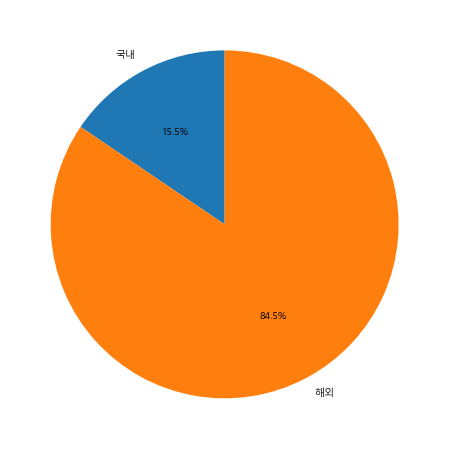

In [519]:
pie_element = [int(contdf_guk[['jeok']].loc[40]),int(contdf_hae[['jeok']].loc[40])]
plt.pie(pie_element, labels=['국내', '해외'], autopct='%.1f%%', startangle=90)

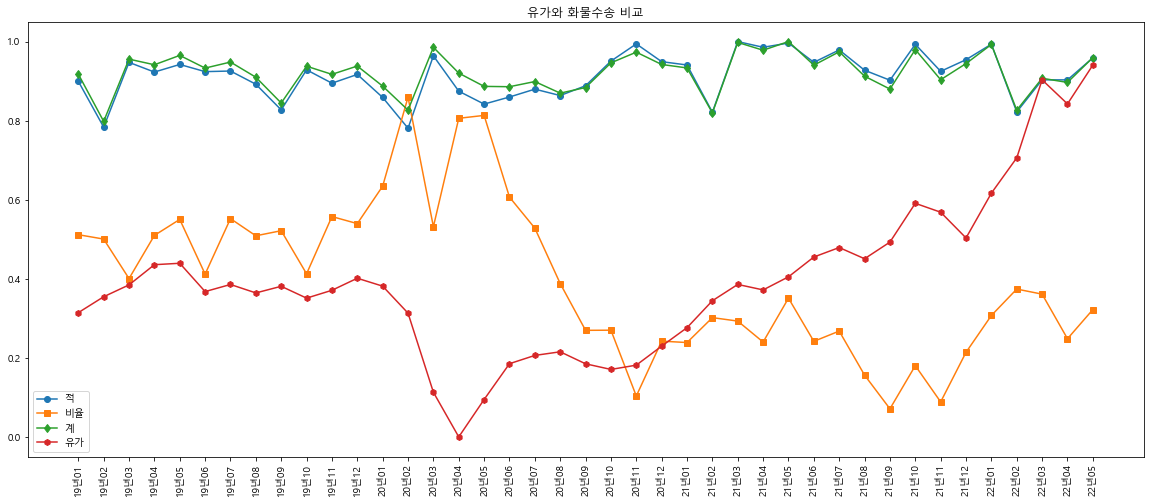

In [520]:
label = list(oildf19['월'])
plt.title('유가와 화물수송 비교')
plt.rcParams['figure.figsize'] = (20,8)
plt.plot(contdf_gye[['jeok_normalize']], marker= 'o')
plt.plot(contdf_gye[['rate_normalize']], marker='s')
plt.plot(contdf_gye[['gye_normalize']], marker='d')
plt.plot(oildf19[['유가_normalize']], marker= 'h')
plt.xticks(range(len(label)), label, rotation='vertical')
plt.legend(['적','비율', '계','유가'])
# oildf.plot()

### 중간분석1
- 우리나라 선박 화물의 대부분은 외국선으로 총 84.5%차지
- 코로나 수출에 관해서는 약간의 영향이 있었겠지만 다른 산업과 비교했을 때는, 큰 타격이 없었다. 
- 22년도 유가 상승과 관련해서 일시적으로 전체 화물수송량이 감소하는 양상을 보였다. 
    - 하지만, 다시 회복하는 것을 보아 유가와의 관련성은 적은 것으로 보인다. 
    - 컨테이너 수송 실적에 영향을 주는 요소들이 비단 유가만 있는게 아니라서, 적은 관련성을 보여주는 듯하다. 
- 21년도 11월부터 비율과 유가의 그래프가 유사한 양상을 보인다. 


In [521]:
contdf_gye['gye_normalize'].corr(oildf19['유가_normalize'])

0.051211022296484235

- 21년도 8월부터 비율과 유가 그래프의 상관관계를 비교해보면, 0.72로 높게 나오는 것을 알 수 있습니다. 

In [522]:
contdf_gye['rate_normalize'][31:].corr(oildf19['유가_normalize'][31:])

0.7206505722237723

In [523]:
contdf_gye['jeok_normalize'].corr(oildf['유가_normalize'])

-0.3231580494808169

### 물동량
- 항만을 통해 들어오고 나가는 연간 화물량
- 전국 31개 무역항 및 26개 연안항에서 연간 처리하는 화물량
- 크게 수출입화물과 환적화물로 분류
    - 수출입화물: 항만을 통해 수출, 수입되는 화물
    - 환적화물: 스케줄이 맞지않거나 항만의 특수한 사정 때문에 다른 항구에서 다른 선박에 옮겨 실어야 하는 화물
- 단위는 TEU로 Twenty Foot Equivalent Unit의 줄임말로 컨테이너 물량 환산 개수

In [524]:
oildf_year = pd.read_csv('./Data/' + 'inter_oil_price_year.csv', index_col = 0)
oildf_year = oildf_year.loc[15:21]
oildf_year
normalize2(oildf_year, '유가')

In [525]:
oildf_year

,유가,유가_normalize
연도,,
15,361.830046,0.280471
16,315.390772,0.041228
17,376.262744,0.354825
18,475.866206,0.867958
19,451.288213,0.741338
20,307.388137,0.000000
21,501.496667,1.000000


In [526]:
mul_df = pd.read_excel('./Data/' + '물동량.xls', header= 2)
mul_df = mul_df.loc[0].to_frame()
mul_df.drop('Unnamed: 0', inplace=True)
mul_df

,0
2015,"1,463,054"
2016,"1,509,479"
2017,"1,574,341"
2018,"1,624,655"
2019,"1,643,966"
2020,"1,499,254"
2021,"1,582,826"


In [527]:
mul_df[0] = mul_df[[0]].applymap(lambda x: x.replace(',', '')).astype(int)
mul_df


,0
2015,1463054
2016,1509479
2017,1574341
2018,1624655
2019,1643966
2020,1499254
2021,1582826


In [528]:
normalize2(mul_df, 0)
mul_df.reset_index(inplace=True)
oildf_year.reset_index(inplace=True)

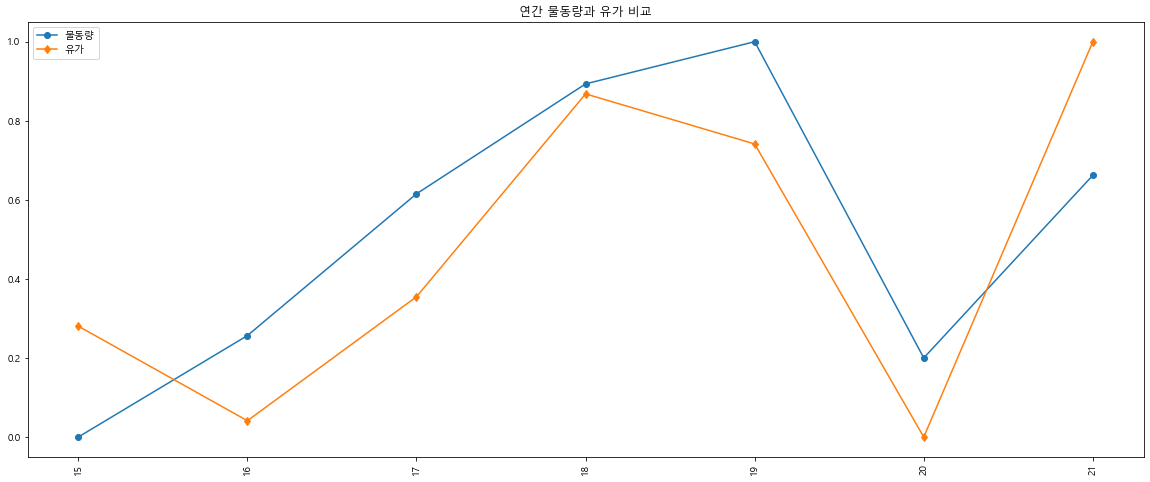

In [529]:
from matplotlib import markers
import matplotlib.pyplot as plt
import platform

if	platform.system()	==	'Windows':
        plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')

label = list(oildf_year['연도'])
plt.title('연간 물동량과 유가 비교')
plt.rcParams['figure.figsize'] = (20,8)
plt.plot(mul_df['0_normalize'], marker = 'o')
plt.plot(oildf_year['유가_normalize'], marker = 'd')
plt.xticks(range(len(label)), label, rotation='vertical')
plt.legend(['물동량', '유가'])

In [530]:
mul_df['0_normalize'].corr(oildf_year['유가_normalize'])

0.7817581820421796

### 중간분석2
- 일반적으로 유가가 낮아지면, 낮은 가격으로 인해 원유 수입이 증가하기 때문에 물동량이 높아진다고 알려져있다.
- 위에 그래프엔 22년도가 없지만 물동량과 유가변화의 높은 상관계수를 고려하면, 유가가 상승했기 때문에 단순하게 보면 
22년도의 물동량도 높아짐을 예상할 수 있다.
- 하지만, 제가 받은 그래프에선 유가와 물동량이 양의 상관관계를 가지는데, 
- 이를 설명하기 위해선, 코로나 사태와 전쟁 등의 주요 글로벌 사건들이 유가와 물동량에 영향을 주었다고 보는 것이 합리적이다.
- 그리고 전쟁이라는 특수적인 상황을 고려한다면 22년도의 물동량이 감소할 수 있다.

- 20년도엔 코로나19 사태의 특수성으로 인해 글로벌 원유 수요 하락으로 인해 물동량도 낮아졌고,
- 21년도에 코로나19 사태가 어느정도 회복되면서 해외 소비재의 수요가 급증하며 반사이익을 누렸다. 
    - 그 이유는 전세계적으로 서비스 수요가 감소한 대신 소비재의 수요가 증가했기 때문

### <span style='color:Blue'> 결론 </span>
- 유가와 컨테이너 화물량 간의 연관성은 크게 두드러지지 않으나, 유가와 물동량 간의 관계는 상당한 연관성을 보인다.
- 전망: LNG를 연료로 하는 선박의 수주량이 증가하고 있고, 또한 메탄올을 원료로 하는 선박도 등장하고 있다.
    - 이를 바탕으로 장기적으로는, 유가와 물동량의 상관관계는 감소할 것으로 전망된다.  

출처: https://www.donga.com/news/Economy/article/all/20220526/113645386/1  
http://www.kookje.co.kr/news2011/asp/newsbody.asp?code=0200&key=20220419.22013004713
